<a href="https://colab.research.google.com/github/PranaliDesai/Deep_Learning/blob/master/MNIST_CNN_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np  
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist    #to import the datasets
from keras.models import Sequential # to define neural model 
from keras.layers import Dense      # allows to connect us layers
from keras.optimizers import Adam   # using optimizer 
from keras.utils.np_utils import to_categorical # to allow one-hot encoding since multiclass datasets
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import Model
import random               

In [0]:
np.random.seed(0)

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # to load train and test datsets with labels 

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

(60000, 28, 28)
(10000, 28, 28)
60000


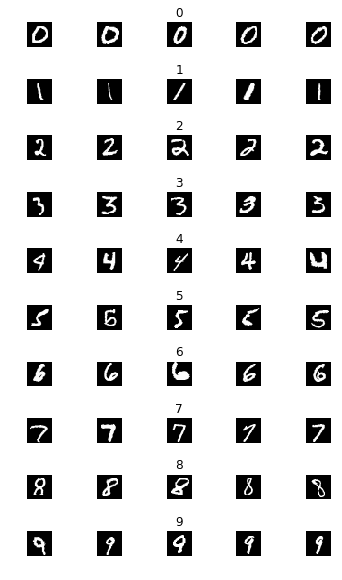

In [0]:
num_of_samples = [] # record number of images in all the ten categories 
 
cols = 5 
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()  # minimizes overlapping between plots 
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j] 
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

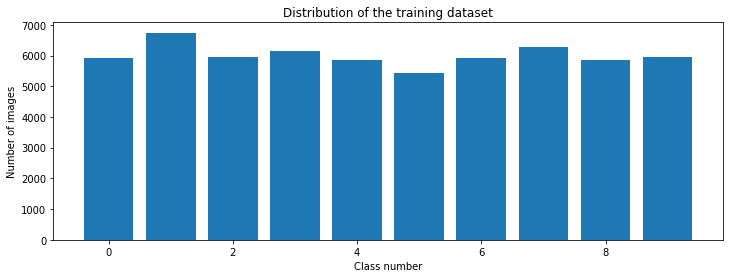

In [0]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1) # adding a depth of 1
X_test = X_test.reshape(10000, 28, 28, 1)

y_train = to_categorical(y_train, 10) #one hot encoding ( here 10 being the number of classes )
y_test = to_categorical(y_test, 10) # one hot encoding ( here 10 being the number of classes )
 
X_train = X_train/255   #normalizing to scale down the features to reduce variance 
X_test = X_test/255     #normalizing to scale down the features to reduce variance 

In [0]:
def leNet_model():  # initially used to deteremine handwritten digits from cheques 
  # create model
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu')) 
  # first argument = number of filter (usually 30 is good)
  # second argument = size of filter since image is 28*28  with depth of 1 
  # third argument = shape of input 
  # after activation we can also define stride and padding argument 
  model.add(MaxPooling2D(pool_size=(2, 2))) # size of the pooling element
  model.add(Conv2D(15, (3, 3), activation='relu')) # only 15 since now image is smaller
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())  # just like deep nn we flattened same happens in fully connected 
  model.add(Dense(500, activation='relu')) # the number of nodes is arbitrary
  model.add(Dropout(0.5)) # droput layer for reducing over fitting ( 1 means - turns all off  and 0 means - turns off none )
  model.add(Dense(num_classes, activation='softmax'))
  # Compile model
  model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model



In [0]:

model = leNet_model()
print(model.summary()) # gives us the details 
history=model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

W0720 03:50:01.265764 140059465058176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0720 03:50:01.299359 140059465058176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0720 03:50:01.305223 140059465058176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0720 03:50:01.334062 140059465058176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0720 03:50:01.378983 140059465058176 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
__________

Text(0.5, 0, 'epoch')

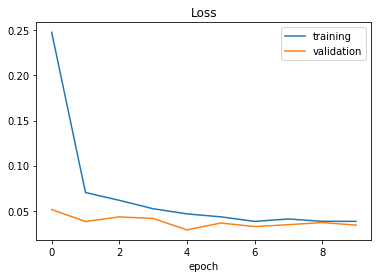

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')
 


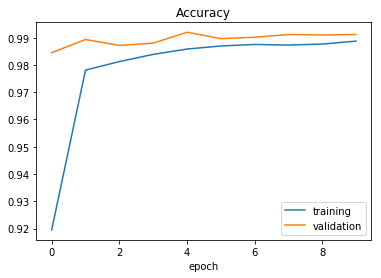

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
score = model.evaluate(X_test, y_test, verbose=0)

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.03284156513003072
Test accuracy: 0.9912


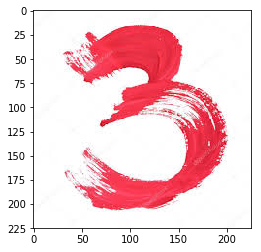

In [0]:
#predict internet number
import requests
from PIL import Image # python imaging library

url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

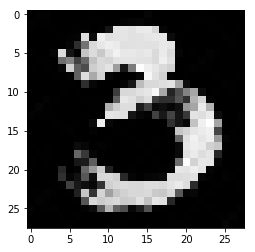

In [0]:
import cv2

img = np.asarray(img) # convert to numpy to be able to modify 
img = cv2.resize(img, (28, 28)) # to convert to make it like the training images 
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # since we need only two dimensional images(gray) that is 28*28
img = cv2.bitwise_not(img) # since our number should be in white and background black(like training images)
plt.imshow(img, cmap=plt.get_cmap('gray')) # to make it like the training images 

In [0]:
img = img/255
img = img.reshape(1,28,28,1)

print("predicted digit: "+str(model.predict_classes(img)))

predicted digit: [3]


(1, 24, 24, 30)
(1, 10, 10, 15)


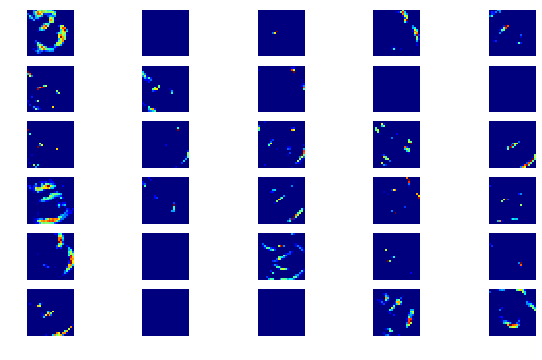

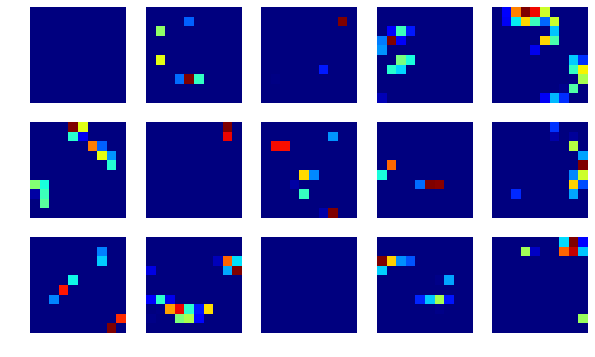

In [0]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output) # defined using Model class API using from pre-trained model
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)
 
visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
 
print(visual_layer1.shape) #conatins 30 outputs 
print(visual_layer2.shape) #conatins 15 outputs 
 
#layer 1 plotting (visual)
plt.figure(figsize=(10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')
    
#layer 2 plotting (visual)
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')